### Student Details

Student name: Akshata Bheemasamudra Mallikarjunappa

Student ID: 23164204

# Description

In this task, we will use NSL-KDD dataset. We will use the NSL-KDD dataset to do multi-class classification. This dataset is quite large, and the training time can be quite long if you use the whole thing so that we will use just 20% of the dataset. If you completed the network security task in the previous activity (i.e., if you are in the BSc in CyberSecurity), you will have seen this already. For those that have not seen this dataset before, you will also be dealing with many more dimensions than you have done up to now, but you will see that the machine learning techniques we have employed up to now scale nicely to many dimensions.

The aim of the NSL-KDD dataset is to enable training a machine learning algorithm to identify different types of cyber attacks based on network trafiic features. The different attacks can be: denial-of-service (dos), Remote to user (r2l), probing attack (probe), User-to-Root (U2R). I hope this means something to the CyberSecurity cohort. For the rest of us, don't worry, we can just see it as a generic classification task.

The data is already split into training and testing. It also contains a mix of different types of features - categorical, binary, and numerical features. However, in this task, we are going to investigate only the numerical features. So, in the code just below, I have stripped out all of the non-numerical features, and provide you with the numpy arrays `train_X`, `train_Y`, `test_X`, and `test_Y`.

Our aim will be to use the available data to train an algorithm to predict the type of attack that is occurring. We will then see if we can get similar performance by using fewer features. Undoubtedly, unless there is a feature that has no influence *at all* on the output, we will see *some* degradation in performance. However, as discussed in the material, there are significant gains to be made by using fewer features.

In [6]:
####################
# CODE PROVIDED

# This code is a little bit complicated, and I don't want you to get bogged down in reading from csv files.
# This code reads from the CSV files, and creates the training and test sets for both binary and multi-class

# Read the data
import pandas as pd
test_df = pd.read_csv('KDDTest_CE4317.csv', header=0)
train_df = pd.read_csv('KDDTrain_CE4317.csv', header=0)

# Differentiating between nominal, binary, and numeric features
# Note, we only need to do this for the train data, as the train and test have the same feature names (of course)
col_names = train_df.columns.values

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 19, 20]
numeric_idx = list(set(range(40)).difference(nominal_idx).difference(binary_idx))

numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

train_Y = train_df['attack_category']
test_Y = test_df['attack_category']

# In this case, we are only going to use the numeric columns for our predictions
train_X = train_df[numeric_cols]
test_X = test_df[numeric_cols]

print(train_X.shape)
print(test_X.shape)

(25192, 31)
(22544, 31)


Let's have a quick look at what some of the samples look like

In [7]:
# Let's look at the data
train_X

duration  src_bytes  dst_bytes  wrong_fragment  urgent  hot  \
0             0        491          0               0       0    0   
1             0        146          0               0       0    0   
2             0          0          0               0       0    0   
3             0        232       8153               0       0    0   
4             0        199        420               0       0    0   
...         ...        ...        ...             ...     ...  ...   
25187         0          0          0               0       0    0   
25188         0        334          0               0       0    0   
25189         0          0          0               0       0    0   
25190         0          0          0               0       0    0   
25191         0          0          0               0       0    0   

       num_failed_logins  num_compromised  num_root  num_file_creations  ...  \
0                      0                0         0                   0  ...   
1                      0                0         0                   0  ...   
2                      0                0         0                   0  ...   
3                      0                0         0                   0  ...   
4                      0                0         0                   0  ...   
...                  ...              ...       ...                 ...  ...   
25187                  0                0         0                   0  ...   
25188                  0                0         0                   0  ...   
25189                  0                0         0                   0  ...   
25190                  0                0         0                   0  ...   
25191                  0                0         0                   0  ...   

       dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
0                 150                  25                    0.17   
1                 255                   1                    0.00   
2                 255                  26                    0.10   
3                  30                 255                    1.00   
4                 255                 255                    1.00   
...               ...                 ...                     ...   
25187             255                   7                    0.03   
25188               1                  39                    1.00   
25189             255                  13                    0.05   
25190             255                  20                    0.08   
25191             255                  49                    0.19   

       dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                        0.03                         0.17   
1                        0.60                         0.88   
2                        0.05                         0.00   
3                        0.00                         0.03   
4                        0.00                         0.00   
...                       ...                          ...   
25187                    0.06                         0.00   
25188                    0.00                         1.00   
25189                    0.07                         0.00   
25190                    0.06                         0.00   
25191                    0.03                         0.01   

       dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                             0.00                  0.00   
1                             0.00                  0.00   
2                             0.00                  1.00   
3                             0.04                  0.03   
4                             0.00                  0.00   
...                            ...                   ...   
25187                         0.00                  0.00   
25188                         0.18                  0.00   
25189                         0.00                  0.00   
25190                         0

And let's look quickly at how many samples in each attack category we have

Text(0, 0.5, 'Attack category')

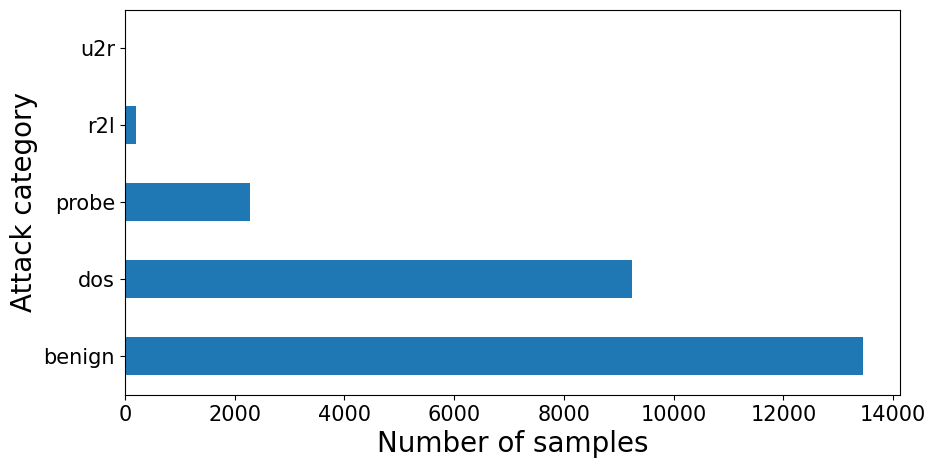

In [8]:
import matplotlib.pyplot as plt

train_attack_cats = train_df['attack_category'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()
train_attack_cats.plot(kind='barh', figsize=(10,5), fontsize=15)
plt.xlabel("Number of samples", fontsize=20)
plt.ylabel("Attack category", fontsize=20)

# **Task 1- Feature Selection**

### **Part 1: Support Vector Classification**

Here, we will use Support Vector Classification to predict the type of network attack that is occurriing, given a set of features. We will use a simple linear SVM Classification, and use the default parameters, as we're not investigating the properties of SVM, but rather the properties of data.

#### Task:
1. Apply the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to the training and test data. Remember, train on the `*_train` data, but apply to both the `*_train` and the `*_test` data
1. Train a linear Support Vector Classification, using [`sklearn`'s `svm.SVC` class](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). All parameters can be left at default except `kernel='linear'`
1. Predict the category of the network attack
1. Print the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
1. Discuss the confusion matrix briefly

You should see that the linear SVM Classification isn't too bad. You should get an accuracy around 0.73


 The predicted values by the model are: ['dos', 'dos', 'benign', 'probe', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'dos', 'dos', 'benign', 'benign', 'benign', 'benign', 'dos', 'dos', 'dos', 'dos', 'benign', 'benign', 'dos', 'dos', 'benign', 'benign', 'dos', 'dos', 'benign', 'benign', 'benign', 'probe', 'probe', 'probe', 'benign', 'benign', 'benign', 'benign', 'dos', 'benign', 'benign', 'benign', 'dos', 'benign', 'dos', 'benign', 'dos', 'benign', 'benign', 'benign', 'dos', 'dos', 'benign', 'benign', 'dos', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'probe', 'benign', 'probe', 'dos', 'dos', 'benign', 'dos', 'benign', 'benign', 'benign', 'dos', 'benign', 'benign', 'benign', 'benign', 'benign', 'dos', 'dos', 'dos', 'benign', 'benign', 'benign', 'dos', 'probe', 'benign', 'benign', 'benign', 'benign', 'dos', 'probe', 'benign', 'benign', 'benign', 'benign', 'probe', 'dos', 'probe', 'benign', 'dos', 'dos', 'benign', 'dos', 'beni

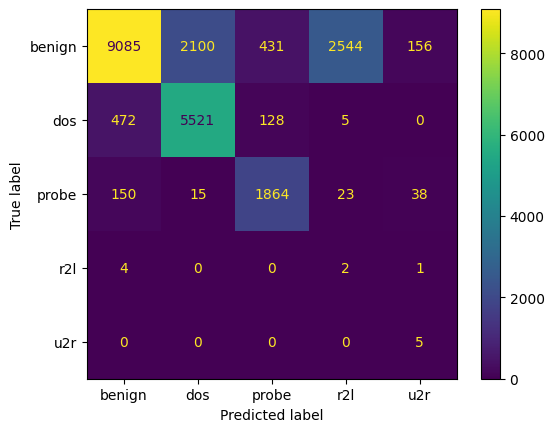

 
 The accuracy score of the SVC model using standardized data is: 0.7308818310858765 


In [9]:
#Scaling the data using standard scaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

#Applying fit and transform on the training data
train_X_stdscaler = std_scaler.fit_transform(train_X)
# Since standardization formulas are already calculated using fit while training train data, we are only applying transform to train the test data.
test_X_stdscaler = std_scaler.transform(test_X)

# Training a SVC model
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

#initializing SVC model
svc = SVC(kernel = 'linear')
# training the SVC model
svc.fit(train_X_stdscaler,train_Y)

# Predicting the output for test data
pred = svc.predict(test_X_stdscaler)
print(f' The predicted values by the model are: {list(pred)}')

# Applying confusion matrix to check the number of classes correctly classified
stdscaler_cm = confusion_matrix( pred, test_Y, labels = svc.classes_)
print(f'\n The confusion matrix for SVC model using standardized data is \n : {stdscaler_cm}')
display = ConfusionMatrixDisplay(confusion_matrix = stdscaler_cm, display_labels=svc.classes_)
display.plot()
plt.show()

#Calculating the overall accuracy score of the model
stdscaler_accuracy = accuracy_score(pred,test_Y)
print(f' \n The accuracy score of the SVC model using standardized data is: {stdscaler_accuracy} ')

### **Discuss the confusion matrix briefly**

The confusion matrix mentioned helps to understand the performance of an algorithm, usually applied to supervised machine learning models. The number reperesents the number of samples/instances of each category of output data. This makes it easy to check whether the model/algorithms is confusing the multiple/binary classes in the dataset or not.
Confusion Matrix is a method of checking the accuracy of the classification model, i.e., how precisely are the classes of the test dataset being classifed into its respective categories(classes) by the model w.r.t the test output.

The matrxi represents the count of the classes being correctly classified.

Therefore, a matrix for test output vs predictd output is created. In the case of above data, a matrix of 5x5 elements is created since we have 5 categorical classes in the output.

As explained below, benign class being classified as benign is 9085 samples, out of the entire test dataset, 5521 samples are correcly classified as dos attack network, 1864 samples as probe attack network and so on. This helps us gain an idea about the number of samples being misclassified which helps us calculcate the precision, recall and f1-score.

**Discuss the confusion matrix briefly**
<span style="color:red">Insert your text answers below</span>.



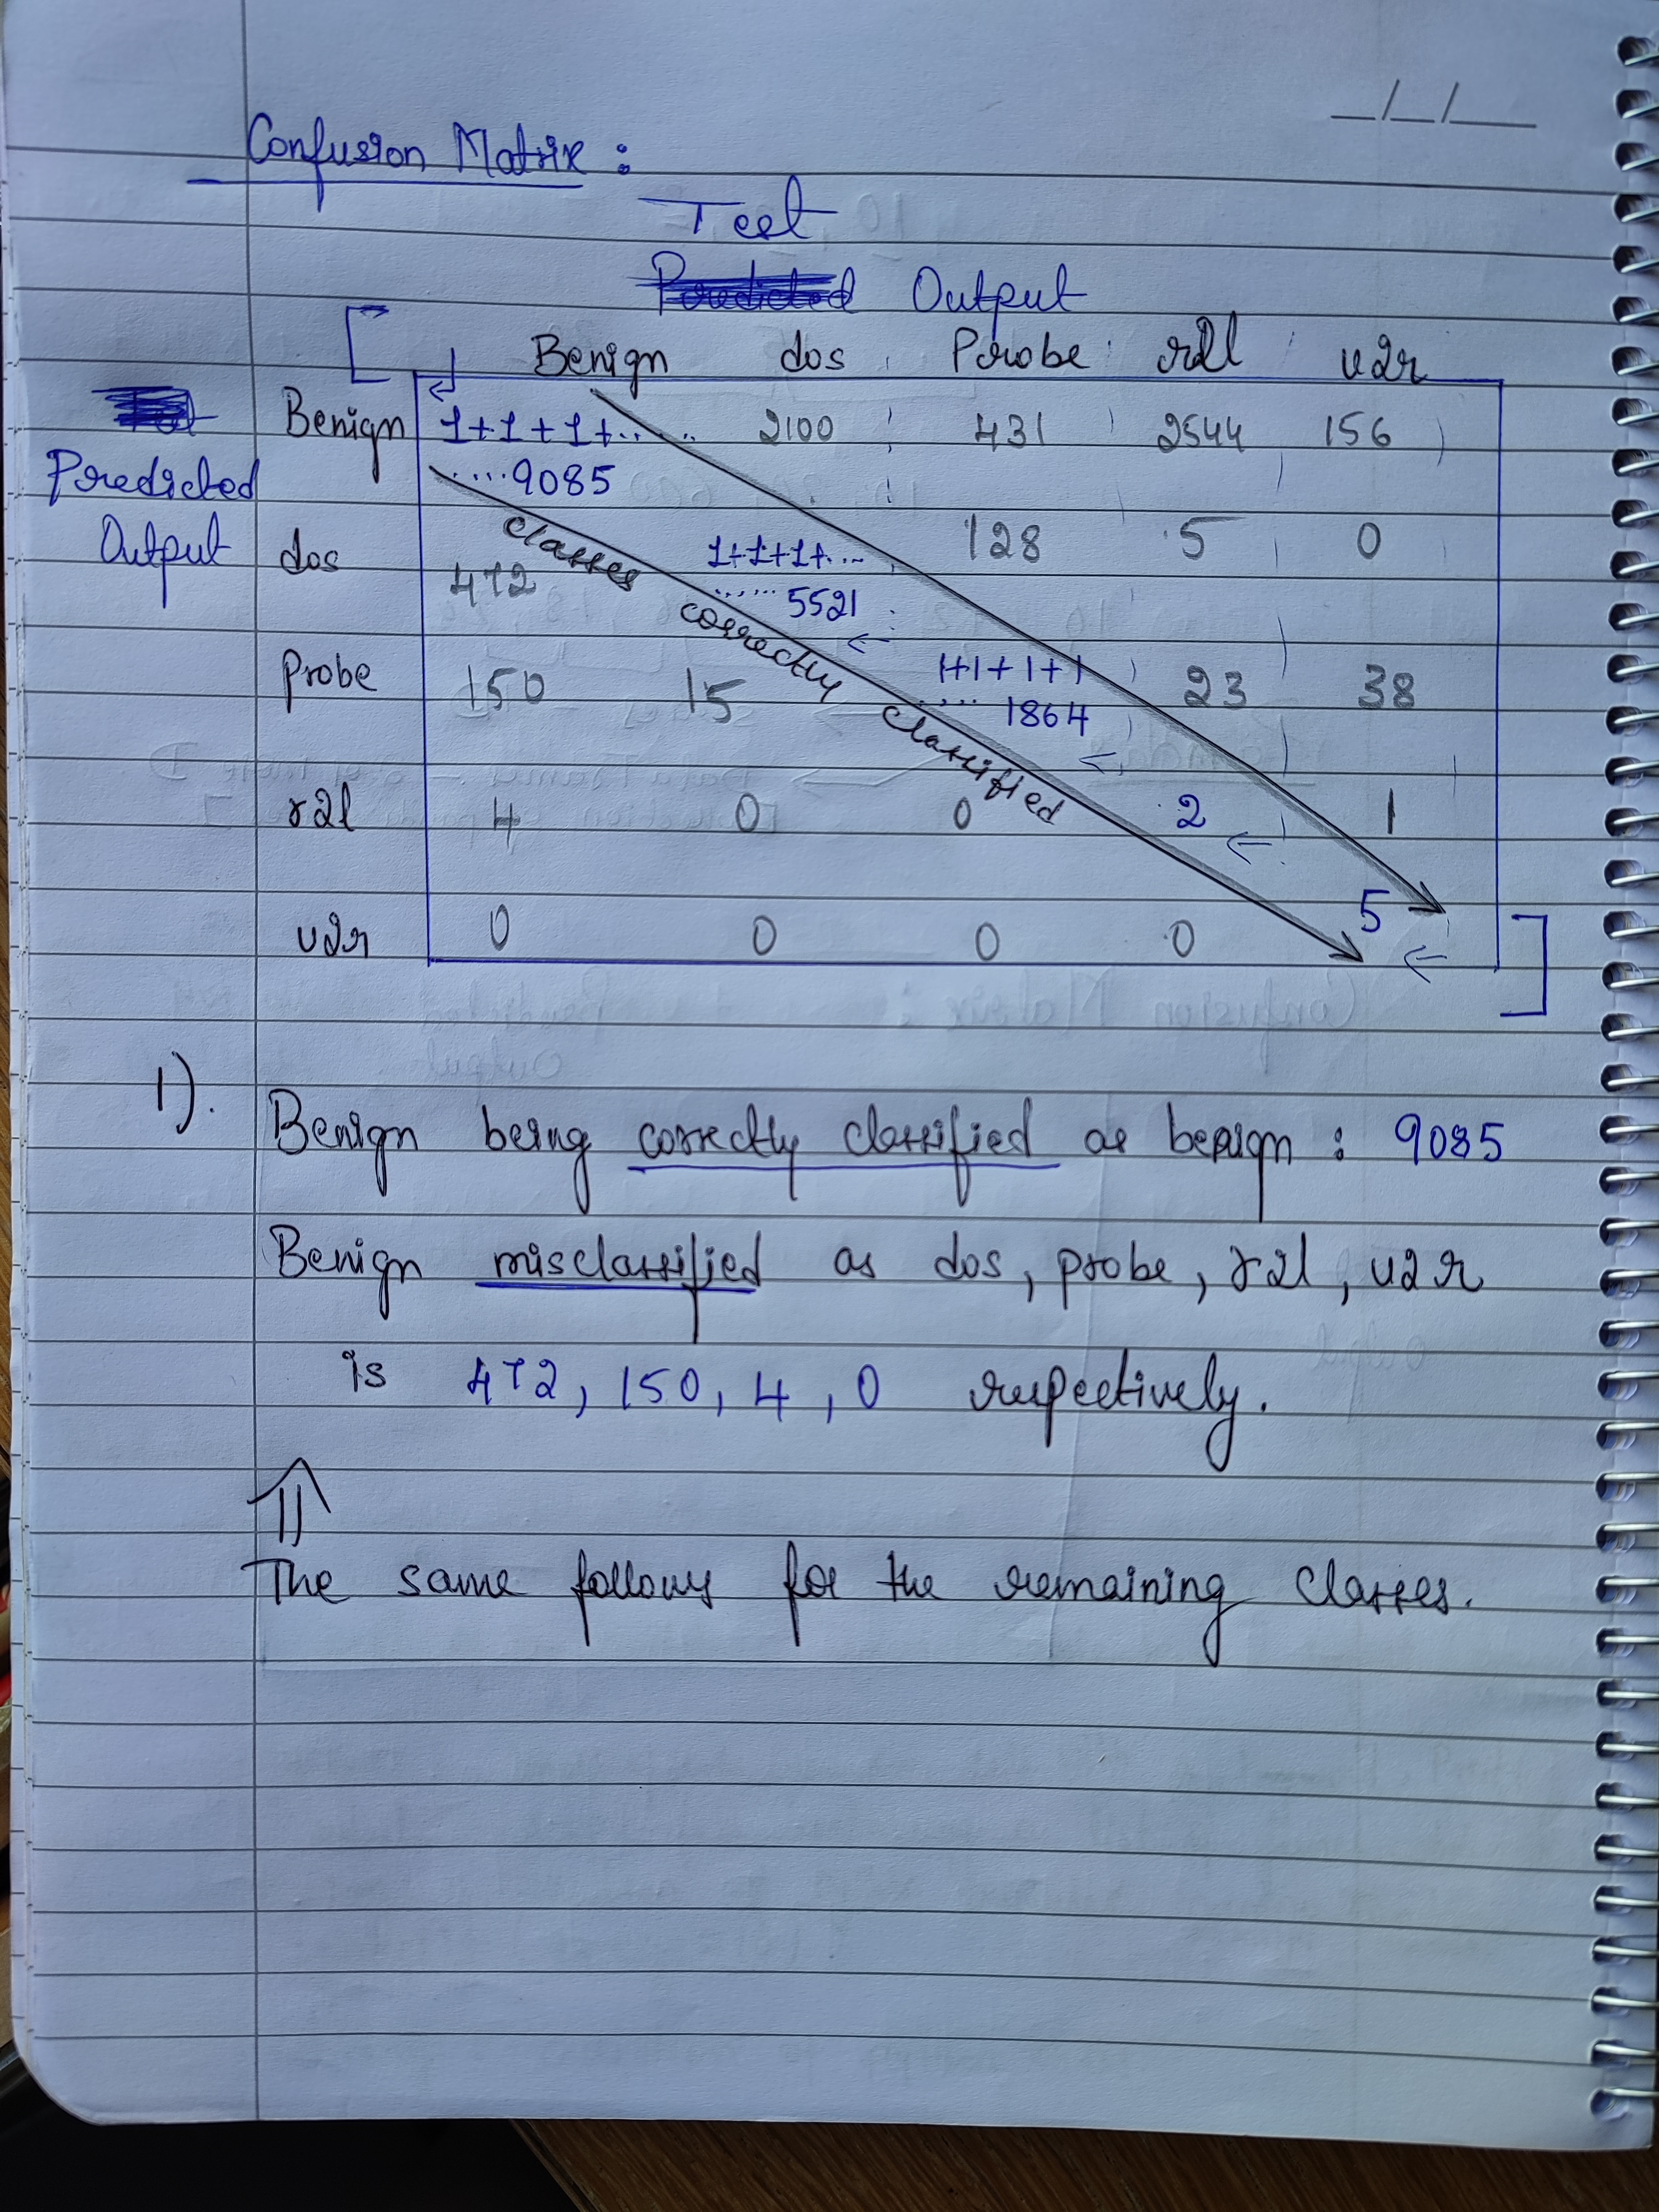

### Part 2: Feature Variance

Feature variance is a rather simple way of predicting if a given feature will have influence on the outcome of a trained model. The principle is that, if a feature has low variance, it cannot have much influence on the model prediction. As an extreme, if we have a variance of 0 in a feature across all samples, i.e. we have the same value for this feature in all samples, then this feature cannot be used to distinguish samples and is useless as a predictor.

However, the converse is not true. A high variance in a feature does not necessarily mean that it is a good predictor. You could imagine a feature that just contains noise with high amplitude. It might have high variance, but is meaningless. Or you can have a feature that has high variance but no influence on the outcome. For example, would hair length in cm have any influence on a baseball players salary? That said, variance can be a useful measure of the strength of a predictor.

The variance of a set of features is given by:

$$
S_{i}^{2} = \frac{\sum_{j=1}^n\left(\textbf{X}_{i,j} - \overline{\textbf{X}}_i \right)^2}{n - 1}
$$

where $\textbf{X}_{i,j}$ is the $j$'th sample of the $i$'th feature, $\overline{\textbf{X}}_i$ is the mean of all the samples of the $i$'th feature, and $n$ is the total number of samples.

Variance thresholding doesn't examine the relationship between the feature $\textbf{X}$ and the output $\textbf{y}$. This has the disadvantage that you can't test if the feature actually has an influence on the output. However, even though in this case we use it in a supervised learning context, it does mean that we can use variance thresholding for unsupervised learning.

#### Notes:
1. In Part 1, we used the `StandardScaler` to scale the features. In general, this is good practice, and in the next Task where we look at PCAs, really is even required. The `StandardScaler` will make it so every feature has a variance of 1 (unless the features started out with a variance of 0 to begin with) and a mean of 0. Therefore, features scaled with `StandardScaler` are useless for thresholding on variance, as there is no practical way to distinguish them.
2. However, we should not do `VarianceThreshold`ing on just the raw data. Have a look at the values in the training dataset. Some columns will have typically small values. It is the nature of that data, and even though they may have a large influence on the type of attack, they will have a lower variance compared to some of the other columns.
3. So we must scale, but not using the `StandardScaler`. Here it is more appropriate to use the [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which scales all the data to the range 0 to 1 by default (though you can set any range).
4. Note that `MinMaxScaler` can also be applied to machine learning algorithms. Just in this case, we want to use the `StandardScaler`. There is, in fact, a [whole suite of other scalers provided by scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). Each has it's own benefits. In fact, some would say we should use `MinMaxScaler` as the default scaler, and only use `StandardScaler` if we know the distribution of the data is normal.

#### Task:
1. Fit an instance of the `MinMaxScaler` with the original `X_train` data. You will get a set of data in the range 0 to 1.
2. It is not very intuitive what threshold of variance we should use. So it's better to plot the variances of each feature, and then decide if some of the variances are small enough to discard
3. Use `np.var` function to calculate the variances of the features (`axis-0`). Plot the variances, and pick a value that might remove 3 or 4 of the features.
4. Fit the output of the `MinMaxScaler` using an object of [`sklearn.feature_selection`'s `VarianceThreshold` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) using this threshold
5. `transform` the data that was scaled with the `StandardScaler`. This is an important step. Notice that we use the output of the `MinMaxScaler` to select the features, but the data we want to use is selected from the `StandardScaler`.
6. Repeat the steps of Part 1: Train an SVC with the selected features and print the accuracy.
7. How does the accuracy compare to the the SVC with no features removed (from Part 1)?

<span style="color:red">Insert your code below</span>.

The variance of each feature is 
: [3.92852549e-03 3.98879822e-05 2.97345308e-04 7.52357388e-03
 3.96935656e-05 7.82661671e-04 1.28920576e-04 1.38865036e-04
 1.39133845e-04 1.75292164e-04 3.57128640e-04 1.51665448e-04
 5.05554723e-02 2.01900716e-02 2.00080371e-01 2.00336829e-01
 1.01594642e-01 1.03895955e-01 1.93273354e-01 3.18788356e-02
 6.58321440e-02 1.50702073e-01 1.88269735e-01 2.01542640e-01
 3.50391220e-02 9.50861799e-02 1.22263384e-02 1.98298891e-01
 1.98975298e-01 9.35522817e-02 1.00696533e-01]


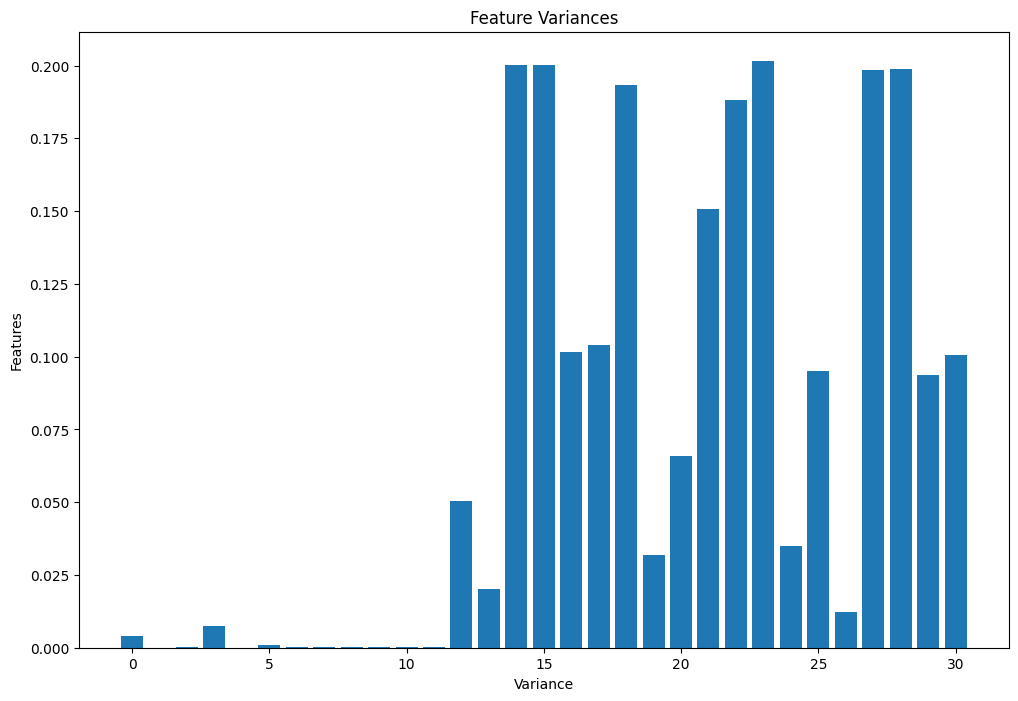

(25192, 21)
(22544, 21)
 
 The predicted values by the model are: ['dos', 'dos', 'benign', 'probe', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'dos', 'dos', 'benign', 'benign', 'benign', 'benign', 'dos', 'dos', 'dos', 'dos', 'benign', 'benign', 'dos', 'dos', 'benign', 'benign', 'dos', 'dos', 'benign', 'benign', 'benign', 'probe', 'probe', 'probe', 'benign', 'benign', 'benign', 'benign', 'dos', 'benign', 'benign', 'benign', 'dos', 'benign', 'dos', 'benign', 'dos', 'benign', 'benign', 'benign', 'dos', 'dos', 'benign', 'benign', 'dos', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'probe', 'benign', 'probe', 'dos', 'dos', 'benign', 'dos', 'benign', 'benign', 'benign', 'dos', 'benign', 'benign', 'benign', 'benign', 'benign', 'dos', 'dos', 'dos', 'benign', 'benign', 'benign', 'dos', 'probe', 'benign', 'benign', 'benign', 'benign', 'dos', 'probe', 'benign', 'benign', 'benign', 'benign', 'probe', 'dos', 'probe', 'benign', 'dos', 'do

In [10]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

minmax_scaler = MinMaxScaler()
#Applying fit and transform on the training data
train_X_mmscaled = minmax_scaler.fit_transform(train_X)

#applying minmax on test data
test_X_mmscaled = minmax_scaler.transform(test_X)

#Calculating the variances variances of the features
feature_variance = np.var(train_X_mmscaled, axis=0)
print(f'The variance of each feature is \n: {feature_variance}')

#Plotting the variances w.r.t its features
plt.figure(figsize = (12,8))
plt.bar(range(len(feature_variance)), feature_variance)
plt.ylabel('Features')
plt.xlabel('Variance')
plt.title('Feature Variances')
plt.show()

#Fitting and transforming
var_thres = VarianceThreshold(threshold = 0.0009)

new_train_X = var_thres.fit_transform(train_X_mmscaled)
print(new_train_X.shape)

new_test_X = var_thres.transform(test_X_mmscaled)
print(new_test_X.shape)

# perform standard sclaer on the newtrainx and newtestx and then pass it into SVC -

new_stdscaler_train_X = std_scaler.fit_transform(new_train_X)

new_stdscaler_test_X = std_scaler.transform(new_test_X)
svc.fit(new_stdscaler_train_X,train_Y)
# Predicting the output for test data
new_pred = svc.predict(new_stdscaler_test_X)
print(f' \n The predicted values by the model are: {list(new_pred)}')

# calculating the new accuracy

new_accuracy =  accuracy_score(new_pred,test_Y)
print(f' \n The accuracy score of the SVC model after applying feature variance to data is: \n  {new_accuracy} ')


 The confusion matrix for SVC model using standardized data is 
 : [[9085 2100  431 2544  156]
 [ 472 5521  128    5    0]
 [ 150   15 1864   23   38]
 [   4    0    0    2    1]
 [   0    0    0    0    5]]


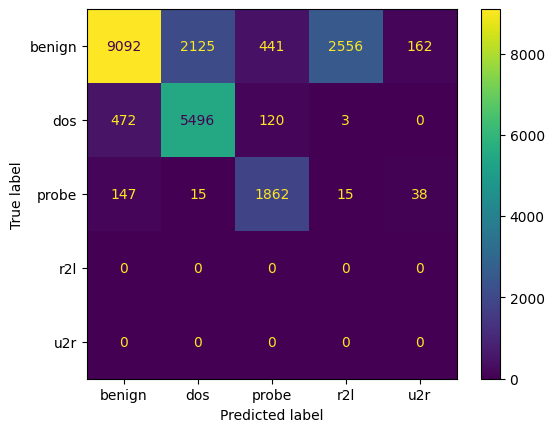

In [11]:
variance_cm = confusion_matrix( new_pred, test_Y, labels = svc.classes_)
print(f'\n The confusion matrix for SVC model using standardized data is \n : {stdscaler_cm}')
display = ConfusionMatrixDisplay(confusion_matrix = variance_cm, display_labels=svc.classes_)
display.plot()
plt.show()

### **How does the accuracy compare to the the SVC with no features removed (from Part 1)?**

- _Standard Scaler_ also known as standardization is a way of standardizing the data, that is, bring down the data format of each feature in the dataset to a standard format for the ML model to be able to perform the algorithms. In the case of standardization, each sample is scaled down to values by considering the mean = 0 and std_dev = 1 of each feature.
For the above dataset, accuracy with stdscaler is 73%.

- _MinMax Scaler_ is another method to scale data down to keeping the variance of samples in each features between 0 & 1. This helps while using Variance_Threshold feature selection process to process the features according to problem statement, as performed above. The accuracy of the model after removing features with variance threshold of 0.0009 is 72.9

- Thus we can conclude that reducing the number of features from 31 (in standard scaler) to 21 (after performing feature selection) did not affect the accuracy of the model to a significant amount. Which in turn suggests that features with variance 0.0009 or less did not have a good correlation with the output data/ uoutput feature and hence did not affect the accuracy of the model to a great extent. In fact, the SVC model performed better by 0.1% with all the features in the dataset which suggests we might as well keep all the features.

-However, this may not always be the case and removing 10 features might change the accuracy depending on the type of dataset we are using.



### Part 3: Univariate Feature Selection - `f_classif`

Univariate feature selection works by performing statistical tests on each of the features (i.e. on each column in our dataset). There are a [few options provided by `scikit-learn`](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection). We will use the [`SelectKBest` functionality](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), which allows us to pick "the top" `K` features per the metric we select. To pick the top features, we will use the [`f_classif` function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), as we are doing a classification. `f_classif` uses the ANOVA F-value to determine features to select. More info on ANOVA is available [here](https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w).

The `SelectKBest` functionality coupled with `f_classif`, will use this score to pick the `K` top features.

#### Task:
1. Loop over the total count of features (i.e. for variable `k` from 1 to 31)
2. Use the [`SelectKBest` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) with [`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) to pick the top `k` features from our dataset
3. Train a new SVM classification with features transformed with the `SelectKBest` object you just created (note: both train and test data have to be transformed)
4. Use the `accuracy_score` function to get the accuracy at each iteration
5. Repeat steps 2 to 4 for each value of `k`.
6. Then plot the accuracy versus number of features in a single plot
7. Given this data, discuss the number of features you might use in a final solution? (Use markdown - no wrong answer here)
8. How doe the "best" accuracy value compare with the SVM before removing any features?

this will take a few minutes to run, go get a coffee!

<span style="color:red">Insert your code below</span>.

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
train_Xstd = scaler.fit_transform(train_X)
test_Xstd = scaler.transform(test_X)
accura = []
features = []
for i in range(1,32):
  selector = SelectKBest(score_func = f_classif, k=i)

  Xtrain_new = selector.fit_transform(train_Xstd,train_Y)
  Xtest_new = selector.transform(test_Xstd)

  svm_classifier = SVC()
  svm_classifier.fit(Xtrain_new, train_Y)
  pre = svm_classifier.predict(Xtest_new)

  accur = accuracy_score(pre,test_Y)
  accura.append(accur)
  features.append(i)
  print(accur)

0.6269517388218595
0.6272178850248403
0.6439850958126331
0.6438963804116394
0.6464247693399574
0.6487757274662882
0.6488644428672817
0.6568931866572036
0.6848828956706884
0.684749822569198
0.6827537260468417
0.6995209368346345
0.7019162526614621
0.7018275372604684
0.7068843151171044
0.721611071682044
0.7191270404542228
0.711985450674237
0.7213449254790631
0.7220102909865153
0.7248491838183109
0.7241394606103619
0.7262686302342086
0.7272001419446416
0.7266678495386799
0.7255589070262598
0.7284421575585521
0.7293293115684882
0.7301721078779276
0.7306156848828956
0.7310149041873669


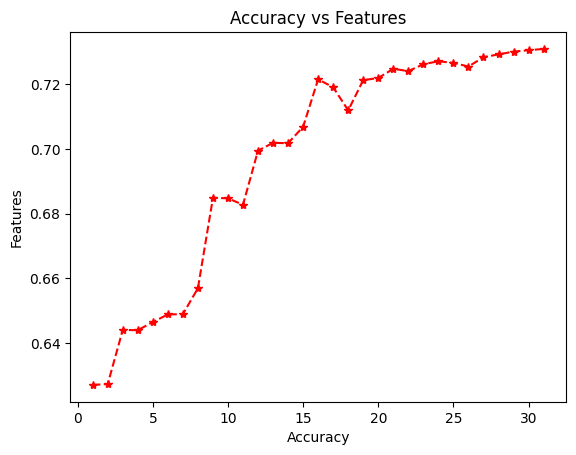

In [14]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.plot( features, accura, 'r*--')
plt.ylabel('Features')
plt.xlabel('Accuracy')
plt.title('Accuracy vs Features')
plt.show()


<span style="color:red">Insert your question answers below</span>.

**7. Given this data, discuss the number of features you might use in a final solution? (Use markdown - no wrong answer here)**

The last 16 features seem good enough to be used cosnidering it is giving an accuracy of 73% and the 16th feature achieves 72% easily while not making a huge difference. This implies that these features are strongly correlated with the target/output variable.

**8. How does the "best" accuracy value compare with the SVM before removing any features?**

There is a negligible improvement of 0.1% which implies that removing cetain features does not have a strong influence on the output variable as those features may not be strongly correlated with the output variabl.


# Task 2: Dimensionality Reduction via PCA

PCA is one of the most commonly used unsupervised transforms, and one of the most commmon means to manipulate data for machine learning. You touched on the PCA in E-tivity 2, where we investigated linear algebra. Here we will use it to reduce the numbers of features needed for a machine learning algorithm.

In the last task, we removed features. The first part, we just used some statistics on the features themselves, in independence of the other features and of the output. Then, we looked at the correlation between features and the output.

What PCA does is look at correlations *between features*. If we have high correlation between two or more features, PCA will find vectors in the feature space that best describe all features. It doesn't remove features, rather it creates a new feature space, and projects all samples to this feature space. The basis of the new feature space is a linear combination of the original features. Maybe a bit crudely, you can think of it as combining features.

Let's look at an example. Here is the first few rows of the dataset.

In [15]:
train_df.head(8)

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   
5         0           tcp   private  REJ          0          0     0   
6         0           tcp   private   S0          0          0     0   
7         0           tcp   private   S0          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   
5               0       0    0  ...                    0.07   
6               0       0    0  ...                    0.04   
7               0       0    0  ...                    0.06   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   
5                    0.07                         0.00   
6                    0.05                         0.00   
7                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   
5                         0.00                  0.00   
6                         0.00                  1.00   
7                         0.00                  1.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   
5                      0.00                  1.00                      1.00   
6                      1.00                  0.00                      0.00   
7                      1.00                  0.00                      0.00   

   attack_category  attack_binary  
0           benign              0  
1           benign              0  
2              dos              1  
3           benign              0  
4           benign              0  
5              dos              1  
6              dos              1  
7              dos              1  

[8 rows x 42 columns]

Ok, so in a small handfull of features, we can spot that (perhaps) `num_root` and `num_compromised` are correlated? Let's plot a few of them that might be correlated.

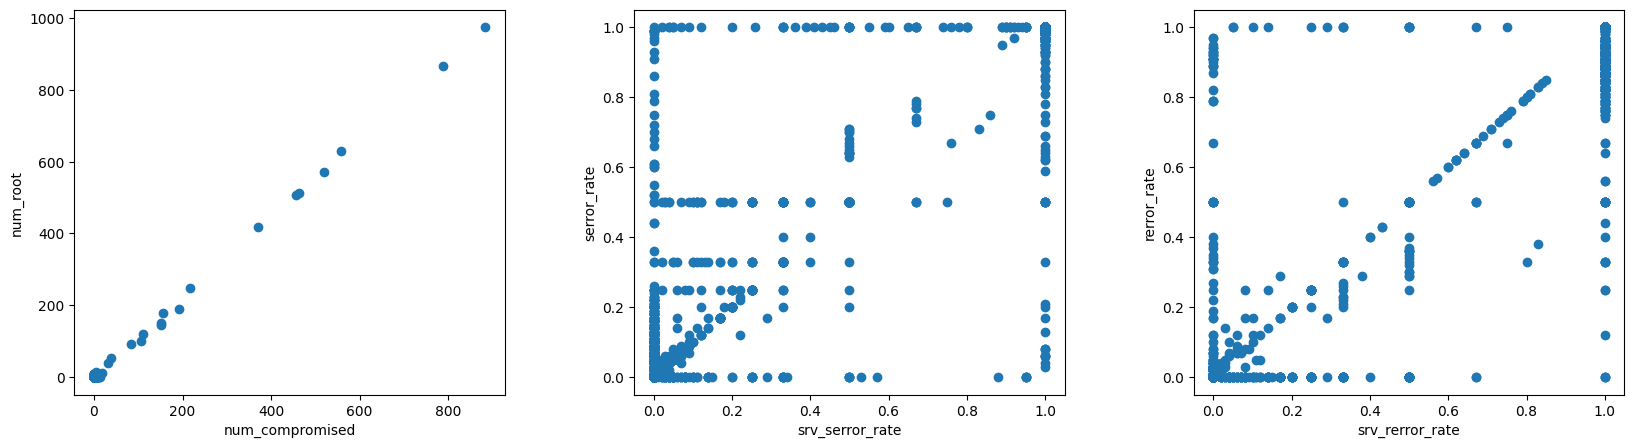

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.3)

ax[0].scatter(train_df['num_compromised'], train_df['num_root']);
ax[0].set(xlabel='num_compromised', ylabel='num_root')

ax[1].scatter(train_df['srv_serror_rate'], train_df['serror_rate']);
ax[1].set(xlabel='srv_serror_rate', ylabel='serror_rate')

ax[2].scatter(train_df['srv_rerror_rate'], train_df['rerror_rate']);
ax[2].set(xlabel='srv_rerror_rate', ylabel='rerror_rate')

plt.show()

Note that the last two plots, while there are outliers in the plots (values at 1.0), most of the data lies along the diagonal. Just the drawing doesn't show this well, though it is highly correlated.

Yes, we can see that there is some correlation between the features we selected here. We can probably assume that there is a causal relationship between them - CyberSecurity specialists wish to comment?

So there is certainly some redundancy here. And likely there are more hidden correlations that we don't know about!

# Task

On to this weeks task. We will perform PCA on the data, before training a linear SVM, and explore some more properties of it, and how it affects the machine learning algorithm.

1. Run [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the standard scaled data. Initially, set the desired variance to keep to 95% (`n_components=0.95`, all other parameters set to default)
2. Train a Support Vector Classification on the PCA reduced data. As with Task 1, use a linear SVM and keep all other parameters as default
3. Try 99% and 90%
4. Play around with desired variance to see if you can reduce the number of features while maintaining an accuracy close to the original dataset above

Discuss the following points, and compare with the previous task in this e-tivity:

1. How many new features are there after the PCA?
2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy
3. How about if we set the variance to 99%? And how about 99.9%?
4. Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?

Note that the parameter `n_components` of `PCA` can take either a real value between 0 and 1, in which case it will pick the number of components that maintains that level of variance in the samples, or it can take an integer value, in which case it will keep that number of components.

<span style="color:red">Insert your code below</span>.

In [17]:
# Keeping 95% of the variance
from sklearn.decomposition import PCA
scaler = StandardScaler()
trainXscaler = scaler.fit_transform(train_X)
testXscaler = scaler.transform(test_X)

pca = PCA(n_components=0.95)

pca_train_X = pca.fit_transform(trainXscaler)
pca_test_X = pca.transform(testXscaler)

print(pca_train_X.shape[1])

19


In [18]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score


svc_pca = SVC(kernel = 'linear')
# training the SVC model
svc_pca.fit(pca_train_X,train_Y)

pca_pred = svc_pca.predict(pca_test_X)

The accuracy of PCA model for 95% of variance is: 0.7298172462739532

 The confusion matrix for SVC model using standardized data is 
 : [[9085 2100  431 2544  156]
 [ 472 5521  128    5    0]
 [ 150   15 1864   23   38]
 [   4    0    0    2    1]
 [   0    0    0    0    5]]


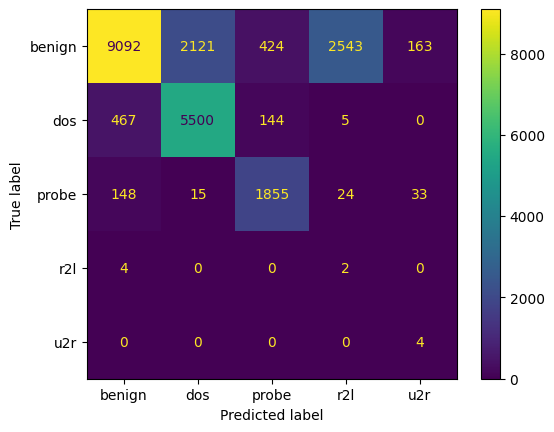

In [21]:
pca_accuracy =  accuracy_score(pca_pred,test_Y)
print(f'The accuracy of PCA model for 95% of variance is: {pca_accuracy}' )

pca_cm = confusion_matrix( pca_pred, test_Y, labels = svc.classes_)
print(f'\n The confusion matrix for SVC model using standardized data is \n : {stdscaler_cm}')
display = ConfusionMatrixDisplay(confusion_matrix = pca_cm, display_labels=svc.classes_)
display.plot()
plt.show()

23
The accuracy of PCA model for 99% of variance is: 0.7301721078779276

 The confusion matrix for SVC model using standardized data is 
 : [[9085 2100  431 2544  156]
 [ 472 5521  128    5    0]
 [ 150   15 1864   23   38]
 [   4    0    0    2    1]
 [   0    0    0    0    5]]


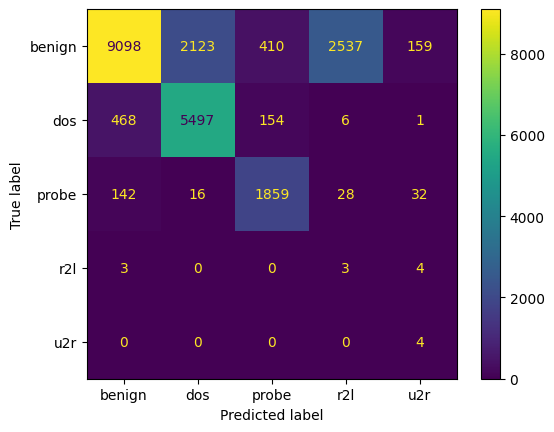

In [22]:
# Keep 99% of the variance
scaler = StandardScaler()
trainXscaler = scaler.fit_transform(train_X)
testXscaler = scaler.transform(test_X)

pca = PCA(n_components=0.99)

pca_train_X = pca.fit_transform(trainXscaler)
pca_test_X = pca.transform(testXscaler)

print(pca_train_X.shape[1])

svc_pca = SVC(kernel = 'linear')
# training the SVC model
svc_pca.fit(pca_train_X,train_Y)

pca_pred = svc_pca.predict(pca_test_X)

pca_accuracy =  accuracy_score(pca_pred,test_Y)
print(f'The accuracy of PCA model for 99% of variance is: {pca_accuracy}' )

pca_cm = confusion_matrix( pca_pred, test_Y, labels = svc.classes_)
print(f'\n The confusion matrix for SVC model using standardized data is \n : {stdscaler_cm}')
display = ConfusionMatrixDisplay(confusion_matrix = pca_cm, display_labels=svc.classes_)
display.plot()
plt.show()

28
The accuracy of PCA model for 99.9% of variance is: 0.7298172462739532

 The confusion matrix for SVC model using standardized data is 
 : [[9085 2100  431 2544  156]
 [ 472 5521  128    5    0]
 [ 150   15 1864   23   38]
 [   4    0    0    2    1]
 [   0    0    0    0    5]]


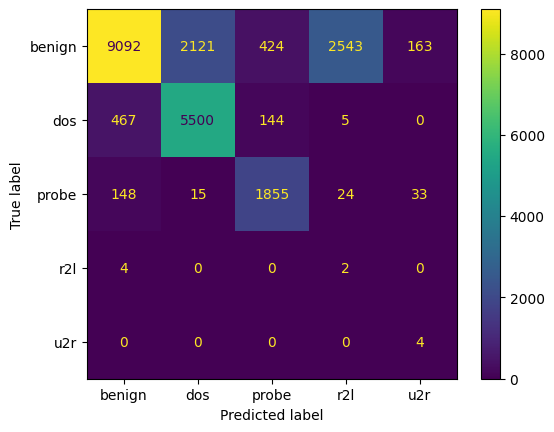

In [23]:
# Keep 99.9% of the variance
scaler = StandardScaler()
trainXscaler = scaler.fit_transform(train_X)
testXscaler = scaler.transform(test_X)

pca = PCA(n_components=0.999)

pca_train_X = pca.fit_transform(trainXscaler)
pca_test_X = pca.transform(testXscaler)

print(pca_train_X.shape[1])

svc_pca = SVC(kernel = 'linear')
# training the SVC model
svc_pca.fit(pca_train_X,train_Y)

pca_pred = svc_pca.predict(pca_test_X)

pca_accuracy =  accuracy_score(pca_pred,test_Y)
print(f'The accuracy of PCA model for 99.9% of variance is: {pca_accuracy}' )

pca_cm = confusion_matrix( pca_pred, test_Y, labels = svc.classes_)
print(f'\n The confusion matrix for SVC model using standardized data is \n : {stdscaler_cm}')
display = ConfusionMatrixDisplay(confusion_matrix = pca_cm, display_labels=svc.classes_)
display.plot()
plt.show()

16
The accuracy of PCA model for 90% of variance is: 0.7263129879347054

 The confusion matrix for SVC model using standardized data is 
 : [[9085 2100  431 2544  156]
 [ 472 5521  128    5    0]
 [ 150   15 1864   23   38]
 [   4    0    0    2    1]
 [   0    0    0    0    5]]


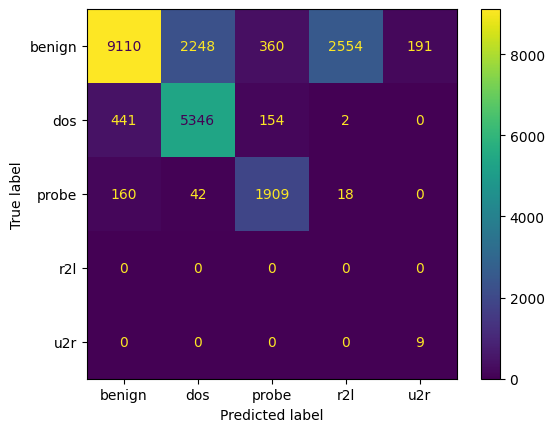

In [24]:
# Keep 90% of the variance
scaler = StandardScaler()
trainXscaler = scaler.fit_transform(train_X)
testXscaler = scaler.transform(test_X)

pca = PCA(n_components=0.90)

pca_train_X = pca.fit_transform(trainXscaler)
pca_test_X = pca.transform(testXscaler)

print(pca_train_X.shape[1])

svc_pca = SVC(kernel = 'linear')
# training the SVC model
svc_pca.fit(pca_train_X,train_Y)

pca_pred = svc_pca.predict(pca_test_X)

pca_accuracy =  accuracy_score(pca_pred,test_Y)
print(f'The accuracy of PCA model for 90% of variance is: {pca_accuracy}' )

pca_cm = confusion_matrix( pca_pred, test_Y, labels = svc.classes_)
print(f'\n The confusion matrix for SVC model using standardized data is \n : {stdscaler_cm}')
display = ConfusionMatrixDisplay(confusion_matrix = pca_cm, display_labels=svc.classes_)
display.plot()
plt.show()

12
The accuracy of PCA model for 80% of variance is: 0.7184616749467707

 The confusion matrix for SVC model using standardized data is 
 : [[9085 2100  431 2544  156]
 [ 472 5521  128    5    0]
 [ 150   15 1864   23   38]
 [   4    0    0    2    1]
 [   0    0    0    0    5]]


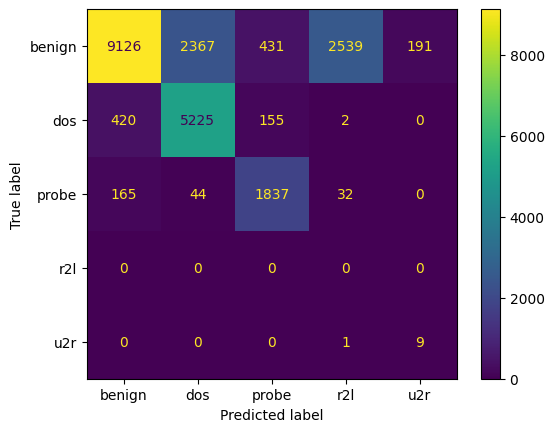

In [25]:
# Keep 80% of the variances
scaler = StandardScaler()
trainXscaler = scaler.fit_transform(train_X)
testXscaler = scaler.transform(test_X)

pca = PCA(n_components=0.80)

pca_train_X = pca.fit_transform(trainXscaler)
pca_test_X = pca.transform(testXscaler)

print(pca_train_X.shape[1])

svc_pca = SVC(kernel = 'linear')
# training the SVC model
svc_pca.fit(pca_train_X,train_Y)

pca_pred = svc_pca.predict(pca_test_X)

pca_accuracy =  accuracy_score(pca_pred,test_Y)
print(f'The accuracy of PCA model for 80% of variance is: {pca_accuracy}' )

pca_cm = confusion_matrix( pca_pred, test_Y, labels = svc.classes_)
print(f'\n The confusion matrix for SVC model using standardized data is \n : {stdscaler_cm}')
display = ConfusionMatrixDisplay(confusion_matrix = pca_cm, display_labels=svc.classes_)
display.plot()
plt.show()

9
The accuracy of PCA model for 70% of variance is: 0.7177075940383251

 The confusion matrix for SVC model using standardized data is 
 : [[9085 2100  431 2544  156]
 [ 472 5521  128    5    0]
 [ 150   15 1864   23   38]
 [   4    0    0    2    1]
 [   0    0    0    0    5]]


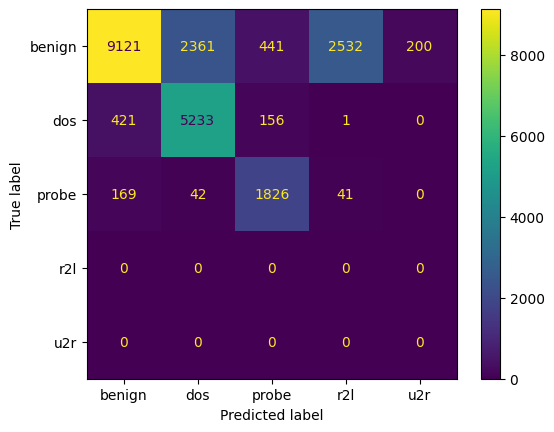

In [26]:
# Keep 70% of the variances

scaler = StandardScaler()
trainXscaler = scaler.fit_transform(train_X)
testXscaler = scaler.transform(test_X)

pca = PCA(n_components=0.70)

pca_train_X = pca.fit_transform(trainXscaler)
pca_test_X = pca.transform(testXscaler)

print(pca_train_X.shape[1])

svc_pca = SVC(kernel = 'linear')
# training the SVC model
svc_pca.fit(pca_train_X,train_Y)

pca_pred = svc_pca.predict(pca_test_X)

pca_accuracy =  accuracy_score(pca_pred,test_Y)
print(f'The accuracy of PCA model for 70% of variance is: {pca_accuracy}' )

pca_cm = confusion_matrix( pca_pred, test_Y, labels = svc.classes_)
print(f'\n The confusion matrix for SVC model using standardized data is \n : {stdscaler_cm}')
display = ConfusionMatrixDisplay(confusion_matrix = pca_cm, display_labels=svc.classes_)
display.plot()
plt.show()

6
The accuracy of PCA model for 60% of variance is: 0.718417317246274

 The confusion matrix for SVC model using standardized data is 
 : [[9085 2100  431 2544  156]
 [ 472 5521  128    5    0]
 [ 150   15 1864   23   38]
 [   4    0    0    2    1]
 [   0    0    0    0    5]]


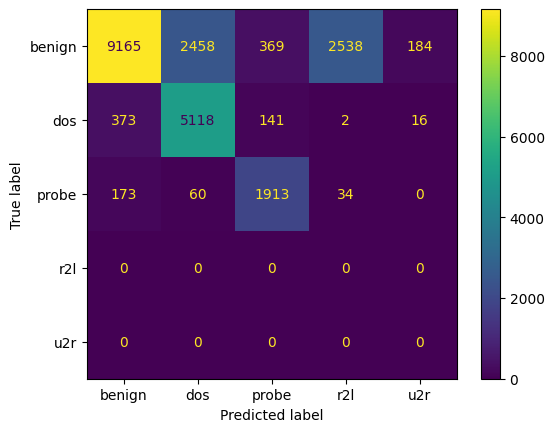

In [27]:
# Keep 60% of the variances

scaler = StandardScaler()
trainXscaler = scaler.fit_transform(train_X)
testXscaler = scaler.transform(test_X)

pca = PCA(n_components=0.60)

pca_train_X = pca.fit_transform(trainXscaler)
pca_test_X = pca.transform(testXscaler)

print(pca_train_X.shape[1])

svc_pca = SVC(kernel = 'linear')
# training the SVC model
svc_pca.fit(pca_train_X,train_Y)

pca_pred = svc_pca.predict(pca_test_X)

pca_accuracy =  accuracy_score(pca_pred,test_Y)
print(f'The accuracy of PCA model for 60% of variance is: {pca_accuracy}' )

pca_cm = confusion_matrix( pca_pred, test_Y, labels = svc.classes_)
print(f'\n The confusion matrix for SVC model using standardized data is \n : {stdscaler_cm}')
display = ConfusionMatrixDisplay(confusion_matrix = pca_cm, display_labels=svc.classes_)
display.plot()
plt.show()

4
The accuracy of PCA model for 50% of variance is: 0.717042228530873

 The confusion matrix for SVC model using standardized data is 
 : [[9085 2100  431 2544  156]
 [ 472 5521  128    5    0]
 [ 150   15 1864   23   38]
 [   4    0    0    2    1]
 [   0    0    0    0    5]]


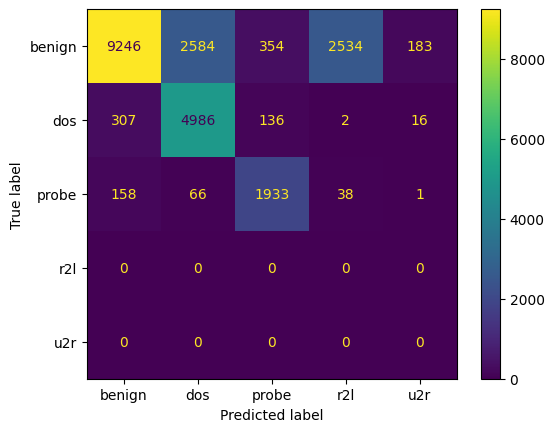

In [28]:
# Keep 50% of the variances

scaler = StandardScaler()
trainXscaler = scaler.fit_transform(train_X)
testXscaler = scaler.transform(test_X)

pca = PCA(n_components=0.50)

pca_train_X = pca.fit_transform(trainXscaler)
pca_test_X = pca.transform(testXscaler)

print(pca_train_X.shape[1])

svc_pca = SVC(kernel = 'linear')
# training the SVC model
svc_pca.fit(pca_train_X,train_Y)

pca_pred = svc_pca.predict(pca_test_X)

pca_accuracy =  accuracy_score(pca_pred,test_Y)
print(f'The accuracy of PCA model for 50% of variance is: {pca_accuracy}' )

pca_cm = confusion_matrix( pca_pred, test_Y, labels = svc.classes_)
print(f'\n The confusion matrix for SVC model using standardized data is \n : {stdscaler_cm}')
display = ConfusionMatrixDisplay(confusion_matrix = pca_cm, display_labels=svc.classes_)
display.plot()
plt.show()

How many new features are there after the PCA?
Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy
How about if we set the variance to 99%? And how about 99.9%?
Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?

### Answers

In [29]:
pip install tabulate

In [30]:
from tabulate import tabulate

In [31]:
table = [[99.9, 28,72.9 ],[99,23,73],
          [95,19,72.7],[90,16,72.6],[80,12,71.8],[70,9,71.7],[60,6,71.8],[50,4,71.7]]

print(tabulate(table, headers=[" Variance %", "No. of features", "Accuracy %"], tablefmt = 'fancy_grid'))

╒═══════════════╤═══════════════════╤══════════════╕
│    Variance % │   No. of features │   Accuracy % │
╞═══════════════╪═══════════════════╪══════════════╡
│          99.9 │                28 │         72.9 │
├───────────────┼───────────────────┼──────────────┤
│          99   │                23 │         73   │
├───────────────┼───────────────────┼──────────────┤
│          95   │                19 │         72.7 │
├───────────────┼───────────────────┼──────────────┤
│          90   │                16 │         72.6 │
├───────────────┼───────────────────┼──────────────┤
│          80   │                12 │         71.8 │
├───────────────┼───────────────────┼──────────────┤
│          70   │                 9 │         71.7 │
├───────────────┼───────────────────┼──────────────┤
│          60   │                 6 │         71.8 │
├───────────────┼───────────────────┼──────────────┤
│          50   │                 4 │         71.7 │
╘═══════════════╧═══════════════════╧═════════

Dropping the features may not be a good idea as it may have some important information that may be of use.

Principal Component Analysis is a technique to process features without removing any features(which implies we are not losing any data here). As compared to other methods like feature variance or univariate where we drop the features which has low variance or which is weakly correlated to the output variable, PCA helps to reduce the no of dimensions not by removing but by combining the samples with similar data or features which strongly correlate.

As shown from the above comparison table,
it is arguable that when variance is 99%, that is when 23 features of the dataset is used for training, we get a good accuracy of 73% however reducing the features to a great extent did not have noticeable change. For example the model performed as good as the previous one with just 4 features.

And w.r.t SVC model, the model performed the same which can be disregarded. We might as well use PCA processed data with less features in order to abstain from overfitting.  

But this may not be the case everytime with all the datasets, we can conclude that independent features are strongly correlated which when combined is able to give the same performance as their independent selves.



### TASK 3: Exploration

**Answer**

- 1. Exploring the exhaustive feature selector library to evaluate subset of features, which tries every possible combination of the features and returns the best-performing subset.  - This option took a very long time to run and there was no output. Please suggest if I am doing it right or if there is another way to go about it.

- 2. In another option of feature selection, We can get the feature importance of each feature of your dataset by using the feature importance property of the model. Extra tree classifier feature importance gives a score for each feature of the data, the higher the score more important or relevant is the feature towards your output variable.Feature importance is an inbuilt class that comes with Tree Based Classifiers that calculates Gini impurity which is the amount of impurity in  adataset.

The below code shows usage of Extra Tree Classifier for extracting the top 10 features from the dataset.

**1.**

In [39]:
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS# from sklearn.svm import SVC
# svm = SVC()

# efs1 = EFS(svm,
#            min_features=3,
#            max_features=7,
#            scoring='accuracy',
#            print_progress=True,
#            cv=5)

# efs1 = efs1.fit(train_X_stdscaler, train_Y)
# print('Best accuracy score: %.2f' % efs1.best_score_)
# print('Best subset (indices):', efs1.best_idx_)
# print('Best subset (corresponding names):', efs1.best_feature_names_)

**2.**

[3.75770480e-03 2.11247831e-02 1.23667926e-02 1.85198756e-02
 9.27418876e-05 1.05107986e-02 5.55354890e-04 6.13835322e-03
 4.51672060e-04 3.27147579e-04 1.84139323e-05 1.61483963e-04
 3.11355090e-02 2.82551220e-02 9.16835262e-02 6.41557544e-02
 2.11886899e-02 2.29389475e-02 1.17269080e-01 1.79995706e-02
 2.13745348e-02 2.60822247e-02 5.50356136e-02 7.82781975e-02
 3.89008546e-02 6.66654964e-02 2.57657441e-02 1.00113160e-01
 6.44830298e-02 3.24964787e-02 2.21533437e-02]


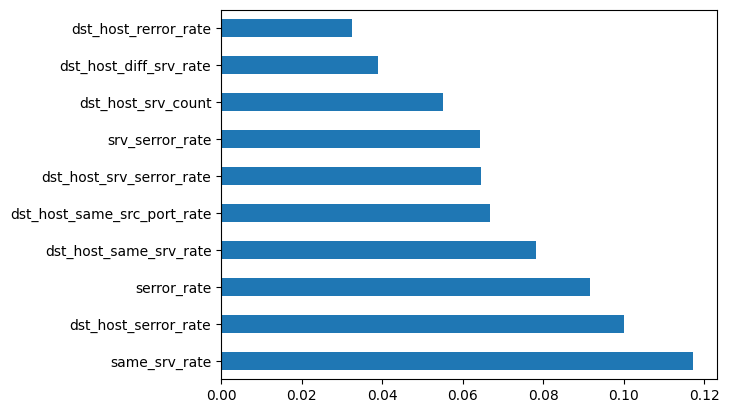

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(train_X_stdscaler,train_Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=train_X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()